In [6]:
#Instalamos la librería que vamos a necesitar para abrir el archivo dta
!pip install pyreadstat
# Primero importamos las librerías necesarias para leer y manipular la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pyreadstat as prs
%pip install pyod 
# Primero instalamos las librerías necesarias para leer y manipular la base de datos
%pip install pyod 
#Este paquete lo vamos a usar para calcular el MAD, lo cual va a ser necesario para eliminar los outliers.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Abrimos la carpeta donde se encuentran las bases de datos
os.chdir(r"C:/Users\s1248850/OneDrive - Syngenta/Documents/Rosario Luque/Ciencias de datos/TP/TP3")
# Guardamos las bases de datos en en dos variables
ind_2004, meta = prs.read_dta("Individual_t104.dta")
%pip install openpyxl
ind_2024 = pd.read_excel("usu_individual_T124.xlsx")

Note: you may need to restart the kernel to use updated packages.


In [147]:
sexo_2004 =ind_2004["ch04"]
sexo_2024 =ind_2024["CH04"]
sexo_2024

172      2
173      1
174      1
175      2
176      1
        ..
46036    1
46037    1
46038    1
46039    2
46040    2
Name: CH04, Length: 2462, dtype: int64

In [59]:
numeric_cols = ind_2004.select_dtypes(include='number')

# Contar los valores negativos por columna en las columnas numéricas
negative_counts = (numeric_cols < 0).sum()

negative_counts

nro_hogar     0
componente    0
h15           0
ano4          0
trimestre     0
             ..
itf           0
ipcf          0
pj1_1         0
pj2_1         0
pj3_1         0
Length: 140, dtype: int64

In [61]:
nan_counts = ind_2024.isna().sum()

nan_counts

CODUSU           0
ANO4             0
TRIMESTRE        0
NRO_HOGAR        0
COMPONENTE       0
              ... 
RDECCFR          0
GDECCFR          0
PDECCFR       2462
ADECCFR          0
PONDIH           0
Length: 177, dtype: int64

a. Eliminen todas las observaciones que no corresponden a los
aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos
Aires, y unan ambos trimestres en una sola base.

In [172]:
# Filtramos los aglomerados de Ciudad Autónoma de Buenos Aires (2) y Gran Buenos Aires (32)
#aglomerados_deseados = ['Ciudad Autónoma de Buenos Aires', 'Gran Buenos Aires']
ind_2004 = ind_2004[ind_2004['aglomerado'].isin([2, 32])]
ind_2024 = ind_2024[ind_2024['AGLOMERADO'].isin([2, 32])]


# Unimos ambas bases de datos
df_unificado = pd.concat([ind_2004, ind_2024], ignore_index=True)
df_unificado

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,TQRMNORWVHLKOPCDEIIAD00861660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,0.0,12.0,NaN,12.0,12.0,NaN,12.0,0.0
6024,TQRMNORWVHLKOPCDEIIAD00861660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,0.0,12.0,NaN,12.0,12.0,NaN,12.0,0.0
6025,TQRMNORWVHLKOPCDEIIAD00861660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,0.0,12.0,NaN,12.0,12.0,NaN,12.0,0.0
6026,TQRMNORWVHLKOPCDEIIAD00861660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,0.0,12.0,NaN,12.0,12.0,NaN,12.0,0.0


b. Si hay observaciones con valores que no tienen sentido,
descártenlas (por ejemplo, ingresos y edades negativos). Expliquen
las decisiones tomadas.

In [194]:
# Definir los valores a eliminar
valores_a_eliminar = [-9, -8, -1, "RIO NEGRO - VIEDMA"]

# Eliminar filas que contienen cualquiera de los valores en 'valores_a_eliminar'
df_unificado = df_unificado[~df_unificado.isin(valores_a_eliminar).any(axis=1)]
ind_2024 = ind_2024[~ind_2024.isin(valores_a_eliminar).any(axis=1)]
ind_2004 = ind_2004[~ind_2004.isin(valores_a_eliminar).any(axis=1)]
# Mostrar el DataFrame limpio
print("DataFrame limpio:")
df_unificado
#en teoría, con esto quedaron eliminados los valores negativos. Me fije cuales eran desde el excel

DataFrame limpio:


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,125558,1.0,3.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,TQRMNORWVHLKOPCDEIIAD00861660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,0.0,12.0,NaN,12.0,12.0,NaN,12.0,0.0
6024,TQRMNORWVHLKOPCDEIIAD00861660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,0.0,12.0,NaN,12.0,12.0,NaN,12.0,0.0
6025,TQRMNORWVHLKOPCDEIIAD00861660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,0.0,12.0,NaN,12.0,12.0,NaN,12.0,0.0
6026,TQRMNORWVHLKOPCDEIIAD00861660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,0.0,12.0,NaN,12.0,12.0,NaN,12.0,0.0


In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Contar la cantidad de hombres y mujeres para cada año
sexo_2004 = df_2004['CH04'].value_counts().sort_index()
sexo_2024 = df_2024['CH04'].value_counts().sort_index()

# Crear un DataFrame con los conteos
sexo_df = pd.DataFrame({
    '2004': sexo_2004,
    '2024': sexo_2024
}, index=['Varón', 'Mujer'])

# Crear el gráfico de barras
sexo_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por Sexo para los Años 2004 y 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

c. Una vez hecha esa limpieza, realicen un gráfico de barras
mostrando la composición por sexo para 2004 y 2024. Comenten
los resultados.

In [195]:
sexo_2004 =ind_2004["ch04"]
sexo_2024 =ind_2024["CH04"]

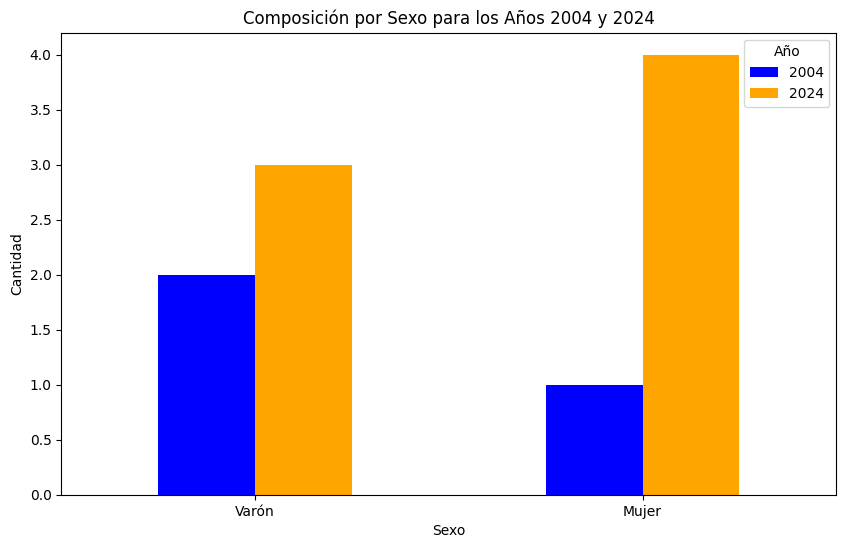

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos del DataFrame sexo_2004 y sexo_2024
sexo_2004 = pd.Series([2, 1], index=[1, 2])
sexo_2024 = pd.Series([3, 4], index=[1, 2])  # Ejemplo de datos para 2024

# Renombrar los índices para que sean 'Varón' y 'Mujer'
sexo_2004.index = ['Varón', 'Mujer']
sexo_2024.index = ['Varón', 'Mujer']

# Crear un DataFrame con los datos de ambos años
df_sexo = pd.DataFrame({
    '2004': sexo_2004,
    '2024': sexo_2024
})

# Crear el gráfico de barras agrupadas
df_sexo.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Composición por Sexo para los Años 2004 y 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

d. Realicen una matriz de correlación para 2004 y 2024 con las
siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED,
ESTADO, CAT_INAC, IPCF.

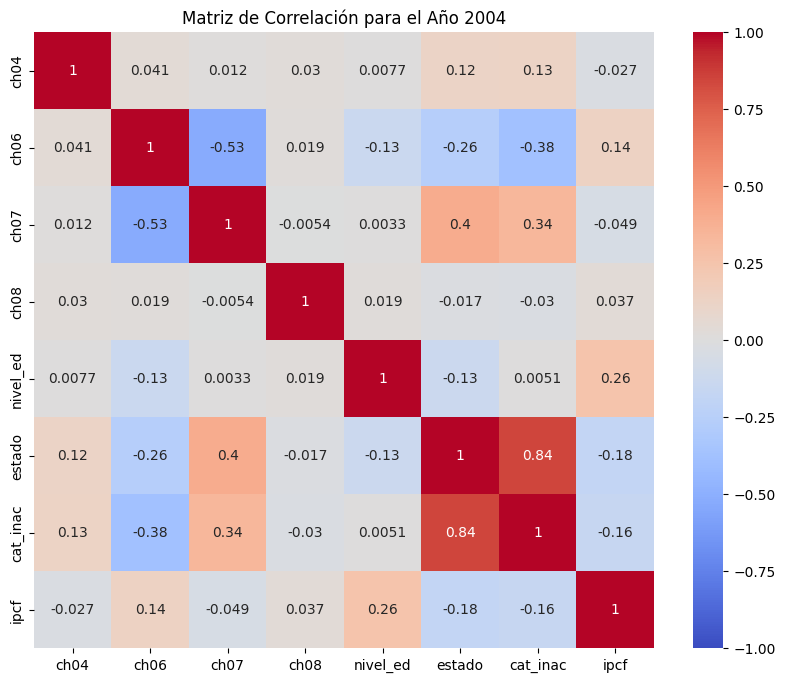

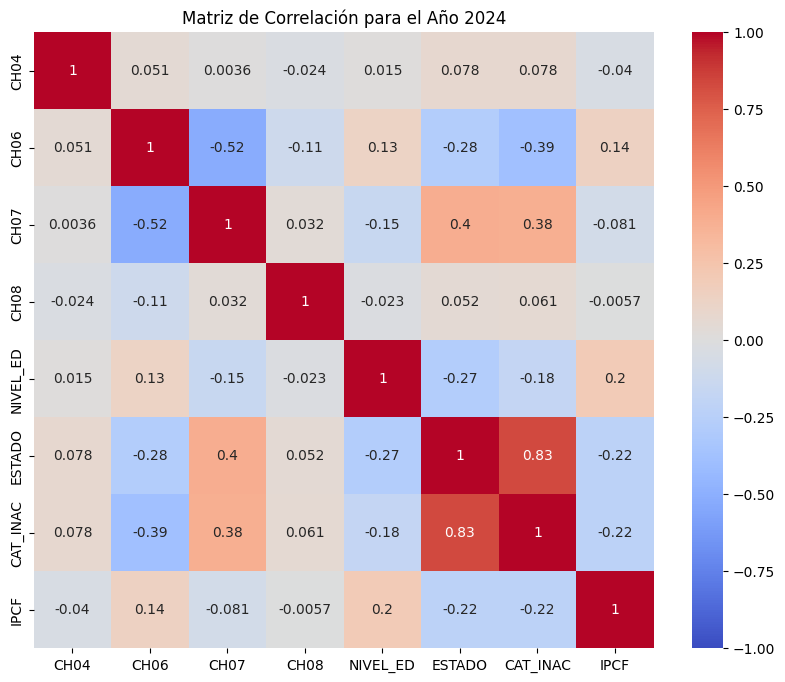

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para los años 2004 y 2024
#df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
#df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Seleccionar las columnas especificadas
variables = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
variables_2= ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
df_2004_selected = ind_2004.loc[:, variables]
df_2024_selected = ind_2024.loc[:, variables_2]

# Calcular la matriz de correlación para cada año
correlation_2004 = df_2004_selected.corr()
correlation_2024 = df_2024_selected.corr()

# Crear un mapa de calor para la matriz de correlación de 2004
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2004, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para el Año 2004')
plt.show()

# Crear un mapa de calor para la matriz de correlación de 2024
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2024, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para el Año 2024')
plt.show()

¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
¿Cuál es la media de ingreso per cápita familiar (IPCF) según
estado (ocupado, desocupado, inactivo)?

estado = desocupados (2), inactivos (3), ocupado (1)

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
#df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Calcular la media del IPCF para cada estado en 2004
mean_ipcf_2004 = df_2004.groupby('estado')['ipcf'].mean()

# Calcular la media del IPCF para cada estado en 2024
mean_ipcf_2024 = ind_2024.groupby('ESTADO')['IPCF'].mean()

# Crear un DataFrame con los resultados
mean_ipcf = pd.DataFrame({
    '2004': mean_ipcf_2004,
    '2024': mean_ipcf_2024
})

# Renombrar los índices para que sean 'Ocupado', 'Desocupado', 'Inactivo'
state_labels = {1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo'}
mean_ipcf.index = mean_ipcf.index.map(state_labels)
mean_ipcf


,2004,2024
NaN,17.000000,0.000000
Ocupado,619.006802,401732.163975
Desocupado,281.447414,107945.722118
Inactivo,431.086823,191272.492811
NaN,377.431077,134889.222772
